## Homework 4

In [239]:
import nltk; print("NLTK Version:", nltk.__version__)
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
import string

import pattern; print("Pattern Version:", pattern.__version__)
from pattern.en import tag

###https://spacy.io/usage/models
###https://nlpforhackers.io/complete-guide-to-spacy/
import spacy; print("Spacy Version:", spacy.__version__)
from spacy import displacy
#spacy.prefer_gpu()

import pandas as pd; print("Pandas Version:", pd.__version__)
import numpy as np; print("Numpy:", np.__version__)

from PIL import Image; print("PIL Image Version:", Image.__version__)

import matplotlib.pyplot as plt;

NLTK Version: 3.4
Pattern Version: 3.6
Spacy Version: 2.0.16
Pandas Version: 0.24.1
Numpy: 1.15.4
PIL Image Version: 5.4.1


##### Part of Speach Tagging Function
The "tagPOS" function implements NLTK, Pattern and Spacy part of speach (POS) taggers.  The function inputs are the text to be tagged and the POS tagger to utilize.  The return value is dependent upon the POS tagger utilized.

In [240]:
def tagPOS(text, tagger):
    if tagger=='pattern':
        print("Pattern POS Tagger")
        tagTokens = tag(text)
    elif tagger == 'spacy':
        print("Spacy POS Tagger")
        nlp = spacy.load('en')
        tagTokens = nlp(text)
    else:
        print("NLTK POS Tagger")
        tokens = nltk.word_tokenize(text)
        tagTokens = nltk.pos_tag(tokens)
    
    return tagTokens

#### Homework 4 - Question 1 - Part A
This question asks for a sentence longer than ten words to be part of speach tagged by one of the taggers implemented in the "tagPOS" function.  The sentence used is one of the sentences from the Introduction of my capstone project.  This sentence is stored in the "longSent" string variable shown below.  

In [241]:
longSent = "Throughout history, astronomy has influenced religion, guided explorers, defined food production schedules and fueled philosophical questions surrounding our very existence and role in the universe."

The NLTK tagger is used to tag "longSent".  The output is shown below.

In [242]:
df = pd.DataFrame(columns=['Token', 'NLTK_POS_Tag'])

ltt = tagPOS(longSent, 'nltk')

for l in ltt:
    if l[0] != "," and ".":
        df = df.append({'Token':l[0], 'NLTK_POS_Tag':l[1]}, ignore_index=True)
    
df

NLTK POS Tagger


,Token,NLTK_POS_Tag
0,Throughout,IN
1,history,NN
2,astronomy,NN
3,has,VBZ
4,influenced,VBN
5,religion,NN
6,guided,VBD
7,explorers,NNS
8,defined,VBD
9,food,NN


#### Homework 4 - Question 1 - Part B
This question is the second part of homework 4, question 1.  The goal of this part of the question is to tag parts of speach in a sentence shorter than ten words and is not classified 100% correctly.  The sentence is shown below in the "shortSent" variable.  

In [243]:
shortSent = "Run!"

Diagramming the short sentence illustrates the noun and verb constructs of an imperative sentence.  The understood you is not physically part of the sentence.  However, it is the noun subject of the sentence and "Run" is the verb.  

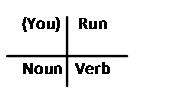

In [244]:
display(Image.open('uYouDiagram.png'))

The output from the short sentence tagging using NLTK is shown below.  NLTK appears to mis-tag the verb "Run" as a noun.  This could be a bit of a trick question.  The sentence below uses an "understood you".  In English, commands such as "Run!" carry an implied subject of "You".  The understood you is a personal pronoun.  The verb in this sentence is "Run".  There could be several reasons why NLTK mis-tagged "Run" in this sentence.  First, NLTK is likely not programmed to detect an understood you.  Second, "Run" is captialized.  This could have been lead NLTK to conclude the word is actually a named entity noun.  

In [245]:
df2 = pd.DataFrame(columns=['Token', 'NLTK_POS_Tag'])

ltts = tagPOS(shortSent, "nltk")

for l in ltts:
    df2 = df2.append({'Token':l[0], 'NLTK_POS_Tag':l[1]}, ignore_index=True)
    
df2

NLTK POS Tagger


,Token,NLTK_POS_Tag
0,Run,NN
1,!,.


#### Homework 4 - Question 2
##### Long Sentence Comparison
Question 2 from homework 4 is a two part question which requests the sentences from homework 4 question 1 be run through different POS taggers.   We will use Pattern and Spacy POS taggers.  The results of these POS taggers will be compared to the output of the NLTK POS tagger.  Examination of the dataframe shows the Pattern POS tagger identified a different part of speach four times compared to the NLTK tagger.  The Spacy tagger produced a different part of speach three times when compared to the NLTK tagger.  

In [246]:
ltt2 = tagPOS(longSent, 'pattern')

df3 = pd.DataFrame(columns=['Token', 'Pattern_POS_Tag'])

#Pattern
for l in ltt2:
    if l[0] != ',' and '.':
        df3 = df3.append({'Token':l[0], 'Pattern_POS_Tag':l[1]}, ignore_index=True)
        
df['Pattern_POS_Tag'] = df3['Pattern_POS_Tag']

#Spacy
ltt3 = tagPOS(longSent, "spacy")

df4 = pd.DataFrame(columns=['Token', 'Spacy_POS_Tag'])

#for l in ltt3:
#    if l[0] != ',':
#        df4 = df4.append({'Token':l[0], 'Spacy_POS_Tag':l[1]}, ignore_index=True) 

for l in ltt3:
    if l.text != ',' and '.':
        if l.tag_ != '':
            df4 = df4.append({'Token':l.text, 'Spacy_POS_Tag':l.tag_}, ignore_index=True)


df['Spacy_POS_Tag'] = df4['Spacy_POS_Tag']

df

Pattern POS Tagger
Spacy POS Tagger


,Token,NLTK_POS_Tag,Pattern_POS_Tag,Spacy_POS_Tag
0,Throughout,IN,IN,IN
1,history,NN,NN,NN
2,astronomy,NN,NN,NN
3,has,VBZ,VBZ,VBZ
4,influenced,VBN,VBN,VBN
5,religion,NN,NN,NN
6,guided,VBD,JJ,VBN
7,explorers,NNS,NNS,NNS
8,defined,VBD,JJ,VBN
9,food,NN,NN,NN


The following three lines of code where numerically mark the instances where the part of speech taggers differ from one another.  If there is no difference, a value of zero will be assigned.  Otherwise, one will be used to indicate a difference.  This will allow for numerical plotting to visualize differences.

In [247]:
df['NLTKtoPattern'] = np.where(df['NLTK_POS_Tag'] == df['Pattern_POS_Tag'], 0, 1)
df['NLTKtoSpacy'] = np.where(df['NLTK_POS_Tag'] == df['Spacy_POS_Tag'], 0, 1)
df['PatterntoSpacy'] = np.where(df['Spacy_POS_Tag'] == df['Pattern_POS_Tag'], 0, 1)

Summarized counts are then created to allows for more granular comparisons below.

In [249]:
dfcount1 = df.groupby('NLTKtoPattern').count()
dfcount2 = df.groupby('NLTKtoSpacy').count()
dfcount3 = df.groupby('PatterntoSpacy').count()

The stacked barplot show below helps visualize the cumulative similarity in part of speach tagging between NLTK, Spacy and Pattern.  Overall, the results are highly similar.  NLTK to Pattern has four instances where the tags do not match compared to three for the other two comparisons.

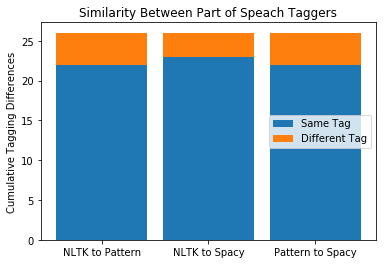

In [250]:
#https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
yep = (dfcount1['Token'][0], dfcount2['Token'][0], dfcount3['Token'][0])
nope = (dfcount1['Token'][1], dfcount2['Token'][1], dfcount3['Token'][1])
width = 0.85

p1 = plt.bar(np.arange(3), yep, width)
p2 = plt.bar(np.arange(3), nope, width, bottom = yep)
plt.xticks(np.arange(3), ("NLTK to Pattern", "NLTK to Spacy", "Pattern to Spacy"))
plt.ylabel("Cumulative Tagging Differences")
plt.title("Similarity Between Part of Speach Taggers")

plt.legend((p1[0], p2[0]), ("Same Tag", "Different Tag"), loc='right')
plt.show()

More detailed analysis of the tagging variations can be performed by looking at the part of speach tags themselves.  With "NLTK_POS_Tag" as the base of comparison, The following dataframe shows the rows where a tagging difference exists.  

In [251]:
dfx = df
dfx['TotalDiff'] = dfx[['NLTKtoPattern', 'NLTKtoSpacy', 'PatterntoSpacy']].sum(axis=1)
dfx = dfx.loc[dfx['TotalDiff'] > 0]
dfx

,Token,NLTK_POS_Tag,Pattern_POS_Tag,Spacy_POS_Tag,NLTKtoPattern,NLTKtoSpacy,PatterntoSpacy,TotalDiff
6,guided,VBD,JJ,VBN,1,1,1,3
8,defined,VBD,JJ,VBN,1,1,1,3
13,fueled,VBD,JJ,VBD,1,0,1,2
18,very,NN,RB,JJ,1,1,1,3


The donut chart below help visualize the total differences by NLTK_POS_TAG.  As shown both above and below, the differences between taggers was confined to two tags:  VBD and NN.  VBD is for past tense verbs.  In each of the "VBD" instances, Pattern misclassified the tokens as adjectives ("JJ").  Spacy classified "guided" and "defined" as "VBN" (verb past participle).  A legitimate debate could be raised about whether or not these two tokens are past tense verbs or past participle verbs.  As the author of the sentence, past tense verb (VBD) was my intent.  Thus, NLTK correctly classified "guided", "defined" and "fueled".  Interestingly, all three taggers classified "influenced" as a "VBD".  

NN represents singular or mass nouns.  NLTK tagged "very" with "NN".  Pattern and Spacy both classified "very" as an adverb (RB).  All of these tags are incorrect as "very" is actually an adjective in the long sentence as it describes the object "existence".  Granted, this is a complex sentence with compound verbs and objects.  However, it is surprising all POS taggers were incorrect in this instance.

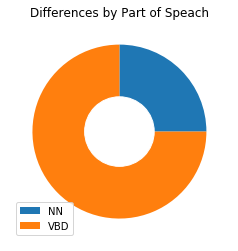

In [252]:
#https://python-graph-gallery.com/160-basic-donut-plot/
plt.pie([dfx.groupby("NLTK_POS_Tag").count()["Token"][0], dfx.groupby("NLTK_POS_Tag").count()["Token"][1]])

plt.title("Differences by Part of Speach")

circle = plt.Circle((0,0), 0.4, color="white")
p=plt.gcf()
p.gca().add_artist(circle)

labels = ['NN', 'VBD']
plt.legend(labels, loc='lower left')

plt.show()

##### Short Sentence Comparison
The imperative sentence "Run!" is much simpler to compare differences to the original NLTK part of speach tagging.  All three POS taggers returned a different tag for the one-word sentence.  Though NLTK and Pattern technically returned different tags, they both classified the word "Run" as a noun.  As discussed before, this is incorrect.  Spacy correctly diagnosed the word "Run" as a verb.  Whether Spacy actually understands the concept of an understood you is not known. The spacy dependency parse tree does not map to an understood you. Regardless, spacy did accurately identify the word "Run" in the imperative sentence.  

In [253]:
print(tagPOS(shortSent, "nltk"))
print(tagPOS(shortSent, "pattern"))
sss = tagPOS(shortSent, "spacy")
print([(s.text, s.tag_) for s in sss])

NLTK POS Tagger
[('Run', 'NN'), ('!', '.')]
Pattern POS Tagger
[('Run', 'NNP'), ('!', '.')]
Spacy POS Tagger
[('Run', 'VB'), ('!', '.')]


###### Displacy Dependency Parse Tree - Short Sentence

In [254]:
displacy.render((sss), style='dep', jupyter = True, options = {'distance': 120})

#### Homework 4 - Question 3 - Part A
Roku announced Q4 earnings last week.  The CNBC headline for this event was a full sentence shown below in the "newsSent" variable.  This sentence will be the subject of part of speach tagging and analysis used in question 3.

In [255]:
newsSent = "Roku shares are soaring on earnings beat and strong streaming growth."

The first request of question 3 is to manually tag the sentence shown above.  A list of token and tag tuples are manually listed below in the "manual" variable.  

In [256]:
manual = [('Roku', 'NNP'), ('shares', 'NNS'), ('are', 'VB'), ('soaring', 'RBS'), ('on', 'IN'), ('earnings', 'NNS'), ('beat', 'NN'), ('and', 'CC'), ('strong', 'JJS'), ('streaming', 'NN'), ('growth', 'NN')]

#### Homework 4 - Question 3 - Part B
The second part of this question instructs us to run this same news sentence through the part of speach taggers used in homework 4 question 2.  A single dataframe is assembled which combines the tagging results of the manual, NLTK, Pattern and Spacy.  Additionally, the mode for each row is calculated and stored independently.  The mode value will be used to compare the results of NLP tagging to the manual tagging.  

In [257]:
dfq4 = pd.DataFrame(columns=['Token', 'Manual_POS_Tag', 'NLTK_POS_Tag', 'Pattern_POS_Tag', 'Spacy_POS_Tag'])

ns1 = tagPOS(newsSent, 'nlkt')
ns2 = tagPOS(newsSent, 'pattern')
ns3 = tagPOS(newsSent, 'spacy')

#Manual
dfq4a = pd.DataFrame()
for m in manual:
    if m[0] != ',' and '.':
        dfq4a = dfq4a.append({'Token':m[0], 'Manual_POS_Tag':m[1]}, ignore_index=True)    

#NLTK
dfq4b = pd.DataFrame()
for n in ns1:
    if n[0] != ',' and '.':
        dfq4b = dfq4b.append({'Token':n[0], 'NLTK_POS_Tag':n[1]}, ignore_index=True)
        
#Pattern
dfq4c = pd.DataFrame()
for n in ns2:
    if n[0] != ',' and '.':
        dfq4c = dfq4c.append({'Token':n[0], 'Pattern_POS_Tag':n[1]}, ignore_index=True)
        
#Spacy
dfq4d = pd.DataFrame()
for n in ns3:
    if n.text != ',' and '.':
        if n.tag_ != '':
            dfq4d = dfq4d.append({'Token':n.text, 'Spacy_POS_Tag':n.tag_}, ignore_index=True)    

dfq4['Token'] = dfq4a['Token']
dfq4['Manual_POS_Tag'] = dfq4a['Manual_POS_Tag']
dfq4['NLTK_POS_Tag'] = dfq4b['NLTK_POS_Tag']
dfq4['Pattern_POS_Tag'] = dfq4c['Pattern_POS_Tag']
dfq4['Spacy_POS_Tag'] = dfq4d['Spacy_POS_Tag']

dfq4['Mode'] = dfq4.mode(axis=1)
dfq4['Diff'] = np.where(dfq4['Manual_POS_Tag'] == dfq4['Mode'], 0, 1)

dfq4

NLTK POS Tagger
Pattern POS Tagger
Spacy POS Tagger


,Token,Manual_POS_Tag,NLTK_POS_Tag,Pattern_POS_Tag,Spacy_POS_Tag,Mode,Diff
0,Roku,NNP,NNP,NNP,NNP,NNP,0
1,shares,NNS,NNS,NNS,NNS,NNS,0
2,are,VB,VBP,VBP,VBP,VBP,1
3,soaring,RBS,VBG,VBG,VBG,VBG,1
4,on,IN,IN,IN,IN,IN,0
5,earnings,NNS,NNS,NNS,NNS,NNS,0
6,beat,NN,NN,NN,VBN,NN,0
7,and,CC,CC,CC,CC,CC,0
8,strong,JJS,JJ,JJ,JJ,JJ,1
9,streaming,NN,NN,VBG,NN,NN,0


#### Homework 4 - Question 3 - Part C
The dataframe is subset and condensed to highlight the instances where manual tagging produced different results from the NLP taggers.  

In [258]:
dfq4 = dfq4[['Token', 'Manual_POS_Tag', 'Mode', 'Diff']]
dfq4 = dfq4.loc[dfq4['Diff'] > 0]
dfq4

,Token,Manual_POS_Tag,Mode,Diff
2,are,VB,VBP,1
3,soaring,RBS,VBG,1
8,strong,JJS,JJ,1


Of the ten total tokens in the sentence from the news, there are three instances where the manual tag does not match the row mode.  The first difference in the token "are".  Manuall tagging labeled it as a verb.  The mode from all taggers identified the token as a verb, non-3rd person singular present (VBP).  VBP is more specific and preferable to the simple verb tag.  The second discrepancy is the token "soaring".  Manual tagging suggest this is a superlative adverb (RBS).  The mode calls the token a "Verb, gerund or present participle".  The NLP taggers were correct again.  In this instance, manual tagging made a mistake by connecting soaring as a descriptor the to verb "are".  The third instance occurs on the token "strong".  The mode tag is adjective.  The manual tag also identifies strong an adjective for further qualifies the token as a superlative adjective (JJS).  In this instance, manual tagging appears to produce a superior result with a more descriptive and accurate tag.  

For visual reference, the "displacy" function from the "spacy" package shows the general part of speach and relationship between the inidividual tokens of the sentence from the news.  

In [259]:
displacy.render((ns3), style='dep', jupyter = True, options = {'distance': 90})